In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn import ensemble
from sklearn.model_selection import train_test_split , RandomizedSearchCV , StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('Data/data.csv')

In [3]:
source = data.drop(['id','Unnamed: 32','diagnosis'],axis=1)
target = data.diagnosis
# standardization
source_s = (source - source.mean()) / (source.std()) 

# Split data on balanced training set and test set

In [4]:
# Train & Test split
train_data, test_data, train_labels, test_labels = train_test_split(source_s, target, test_size = 0.3, random_state=0, stratify=target)

# Feature Selection with Random Forest

In [5]:
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(source_s, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy is:  0.9415204678362573


C:\Users\Amin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


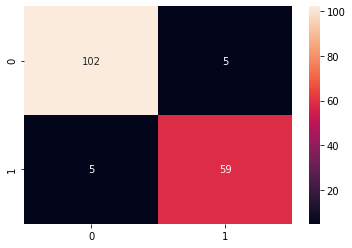

In [8]:
#random forest classifier with n_estimators=10 (default)
model = RandomForestClassifier(random_state=43)      
model = model.fit(train_data,train_labels)

ac = accuracy_score(test_labels,model.predict(test_data))
print('Accuracy is: ',ac)
cm = confusion_matrix(test_labels,model.predict(test_data))
sns.heatmap(cm,annot=True,fmt="d")

**Accuracy is 94%**

# Feature Extraction

We will use principle component analysis (PCA) for feature extraction. 

Text(0, 0.5, 'explained_variance_ratio_')

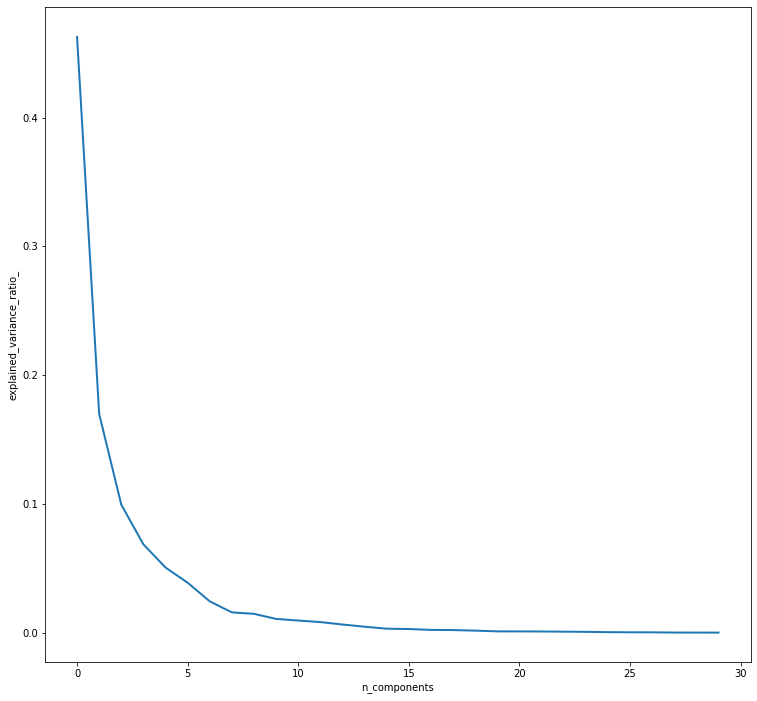

In [32]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(train_data)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

**According to variance ration, 3 component can be chosen. So in K nearest neighbour, we set (n_neighbors = 3).**

# K nearest neighbour

In [10]:
from sklearn import neighbors, linear_model

knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
#Training the machine with our model
knn_model_1 = knn.fit(train_data, train_labels)
print('k-NN accuracy for test set: %f' % knn_model_1.score(test_data, test_labels))

k-NN accuracy for test set: 0.935673


In [12]:
from sklearn.metrics import classification_report
y_true, y_pred = test_labels, knn_model_1.predict(test_data)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           B       0.96      0.93      0.95       107
           M       0.90      0.94      0.92        64

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



**Accuracy is almost 94%**

# Logistic Regression

In [34]:
#Using Logistic Regression 
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(train_data, train_labels)
    
#print model accuracy on the training data.
print('[0]Logistic Regression Training Accuracy:', log.score(train_data, train_labels))

[0]Logistic Regression Training Accuracy: 0.9949748743718593


C:\Users\Amin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, log.predict(test_data))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Mode Testing Accuracy = "{}!"'.format((TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line

[[104   3]
 [  4  60]]
Mode Testing Accuracy = "0.9590643274853801!"



In [38]:
#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#Check precision, recall, f1-score
print( classification_report(test_labels, log.predict(test_data)) )
#Another way to get the models accuracy on the test data
print( accuracy_score(test_labels, log.predict(test_data)))
print()#Print a new line

              precision    recall  f1-score   support

           B       0.96      0.97      0.97       107
           M       0.95      0.94      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

0.9590643274853801



# SVC linear

In [35]:
#Using SVC linear
from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(train_data, train_labels)

#print model accuracy on the training data.
print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(train_data, train_labels))

[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9949748743718593


In [39]:
cm = confusion_matrix(test_labels, svc_lin.predict(test_data))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Mode Testing Accuracy = "{}!"'.format((TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line

[[103   4]
 [  6  58]]
Mode Testing Accuracy = "0.9415204678362573!"



In [40]:
#Show other ways to get the classification accuracy & other metrics 

#Check precision, recall, f1-score
print( classification_report(test_labels, svc_lin.predict(test_data)) )
#Another way to get the models accuracy on the test data
print( accuracy_score(test_labels, svc_lin.predict(test_data)))
print()#Print a new line

              precision    recall  f1-score   support

           B       0.94      0.96      0.95       107
           M       0.94      0.91      0.92        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

0.9415204678362573

